In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt

1294.368

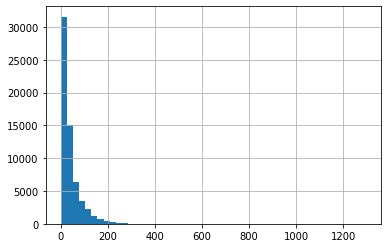

In [2]:
##import and concatenate datasets
df00 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2000.csv')
df01 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2001.csv')
df02 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2002.csv')
df03 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2003.csv')
df04 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2004.csv')
df05 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2005.csv')
df06 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2006.csv')
df07 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2007.csv')
df08 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2008.csv')
df09 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2009.csv')
df10 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2010.csv')
df11 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2011.csv')
df12 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2012.csv')
df13 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2013.csv')
df14 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2014.csv')
df15 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2015.csv')
df16 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2016.csv')
df17 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2017.csv')
df18 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2018.csv')
df19 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Pennings/2019.csv')

frames = (df00, df01, df02, df03, df04, df05, df06, df07, df08, df09, df10, \
          df11, df12, df13, df14, df15, df16, df17, df18, df19)

df = pd.concat(frames)
#df['Year'] = pd.DatetimeIndex(pd.to_datetime(round(df['Year']), format = '%Y')).year

df['Plant_Biomass'] = df['Plant_Biomass']/df['Quadrat_Area'] #adjust to grams/m^2

df

df['Plant_Biomass'].hist(bins = 50)
max(df['Plant_Biomass'])

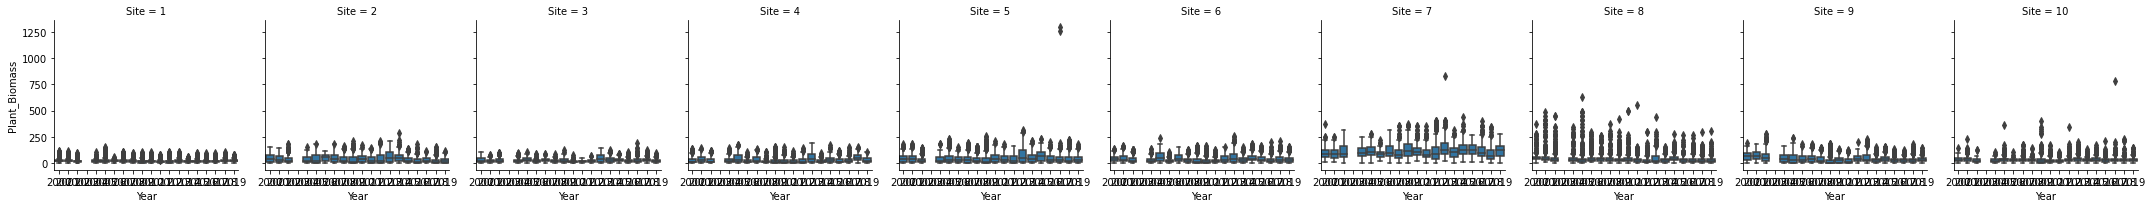

In [3]:
#df['Plant_Biomass'].hist(by=df['Year'])

df2 = df.groupby(['Plot', 'Zone', 'Site', 'Year'], as_index = False).aggregate([np.mean, \
                                                                                np.size, np.std]).reset_index()

df3 = df.groupby(['Plot', 'Zone', 'Site', 'Year'], as_index = False).mean()

site_list = [7]
df4 = df[df['Site'].isin(site_list)]

g = sns.FacetGrid(df, col="Site", sharex=False)
g.map(sns.boxplot, 'Year', 'Plant_Biomass', order=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,\
                                                   2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,\
                                                   2016 ,2017 ,2018 , 2019]) 

##what is going on with site 7?

In [12]:
df3
dfx = df.groupby(['Site'], as_index = False).mean()
dfx = dfx[['Site', 'Longitude', 'Latitude']]
dfx
##lat/lon - these average lat/longs are used in GEE script! They are the points used in analysis

,Site,Longitude,Latitude
0,1,-81.422318,31.539096
1,2,-81.295564,31.535967
2,3,-81.229141,31.518847
3,4,-81.365805,31.451791
4,5,-81.340722,31.435814
5,6,-81.280011,31.387962
6,7,-81.478498,31.334813
7,8,-81.415535,31.308242
8,9,-81.333707,31.351518
9,10,-81.270863,31.476948


In [47]:
longx = df['Longitude'].unique()
latx = df['Latitude'].unique()

unique_coordinates = pd.DataFrame(latx, longx)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  ## more options can be specified also
    print(unique_coordinates)

                    0
-81.422539  31.538627
-81.422498  31.538535
-81.422441  31.538468
-81.422396  31.538360
-81.422332  31.538427
-81.422287  31.538494
-81.422262  31.538551
-81.422205  31.538615
-81.422821  31.539402
-81.422692  31.539388
-81.422546  31.539415
-81.422410  31.539429
-81.422250  31.539457
-81.422098  31.539480
-81.421937  31.539505
-81.421750  31.539491
-81.296118  31.536199
-81.295890  31.536192
-81.295753  31.536255
-81.295047  31.536124
-81.295029  31.536007
-81.295100  31.535851
-81.295118  31.535734
-81.295103  31.535651
-81.296236  31.536099
-81.296091  31.536026
-81.295928  31.535967
-81.295808  31.535901
-81.295682  31.535836
-81.295535  31.535847
-81.295395  31.535843
-81.295282  31.535886
-81.228956  31.518920
-81.228978  31.518776
-81.228997  31.518678
-81.229033  31.518546
-81.229055  31.518422
-81.229103  31.518307
-81.229197  31.518198
-81.229238  31.518161
-81.229011  31.519592
-81.229065  31.519461
-81.229109  31.519346
-81.229288  31.519177
-81.229355

In [49]:
##Exporting coordinates

out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'meancoord.csv')

#dfx.to_csv(out_csv)